In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
image = cv2.imread('../images/lena.jpg', 0)

In [19]:
def plot_frequency_domain(image):
    frequency_image = np.fft.fftshift(np.fft.fft2(image))

    magnitude_spectrum = np.log(np.abs(frequency_image) + 1)

    plt.figure(figsize=(10, 10))
    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title("Imagem no dominio espacial")

    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Imagem com espectro de magnitude')

    plt.show()

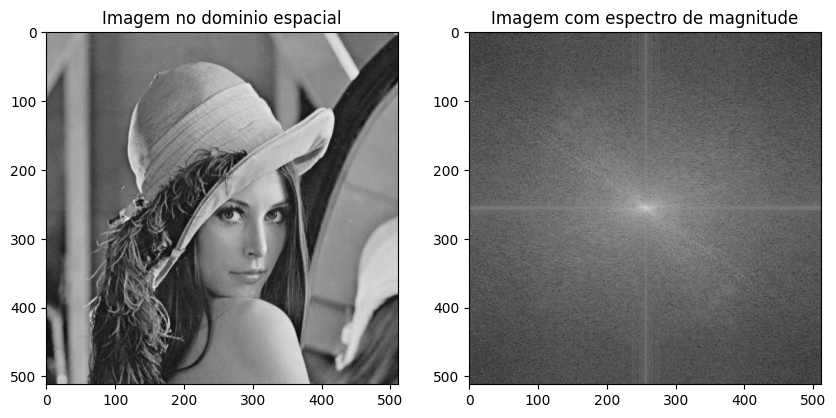

In [20]:
plot_frequency_domain(image)

In [29]:
%pip install scikit-image
from skimage.draw import draw

Note: you may need to restart the kernel to use updated packages.


In [31]:
def filter_frequency_domain(image, low_pass=True):
    frequency_image = np.fft.fftshift(np.fft.fft2(image))

    rows, cols = image.shape
    crow, ccol = rows//2, cols//2

    rr, cc = draw.disk((crow, ccol), 30, shape=(rows, cols))

    if low_pass:
        mask = np.zeros((rows, cols), np.uint8)
        mask[rr, cc] = 1
    else: 
        mask = np.ones((rows, cols), np.uint8)
        mask[rr, cc] = 0

    filtered_frequency = frequency_image * mask

    f_ishift = np.fft.ifftshift(filtered_frequency)
    img_back = np.fft.ifft2(f_ishift)

    img_back = np.abs(img_back)

    return img_back


    

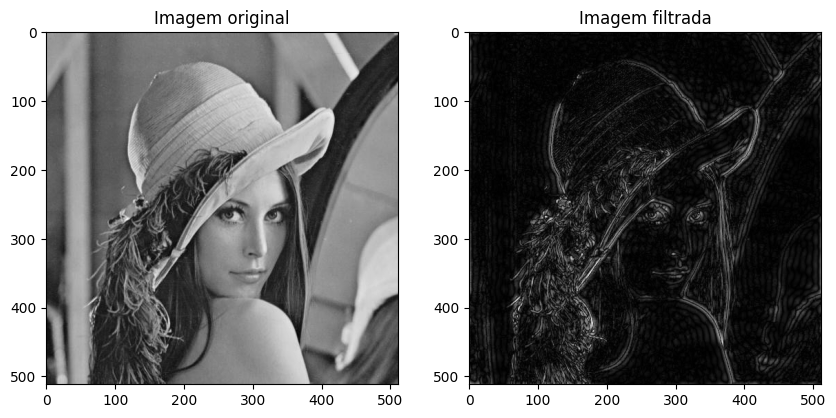

In [33]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title("Imagem original")

plt.subplot(122), plt.imshow(filter_frequency_domain(image, low_pass=False), cmap='gray')
plt.title('Imagem filtrada')

plt.show()